##### Lending Club Case Study
##### Author - Ravi Kumar Dhiman

##### Background:
* A Consumer Finance Company specializes in lending various types of loan to urban customers.
* Company decides on loan approval based on customers profile
* __2 Major risks__ associated with __approval decision__:
    1. __Loss of Business__: Loan approved when Customer is likely to repay loan.
    2. __Financial Loss__: Loan approved when Customer is not likely to repay loan i.e. likely to default
* __Loan Accepted__ - 3 Scenarios occur :
    1. __Fully Paid__: Principal and Interest Repaid.
    2. __Current__: Ongoing Loan and Customer paying instalments. Loan Tenure not completed.
    3. __Charged-off__: Instalments not paid in due time for a long time i.e. Customer Defaulted on Loan.
* __Loan Rejected__ - No transactional history present & hence, data not available with the Company/in the used dataset. This category has no impact on the assessment of bad loans because there is no transaction history present.


##### Objective (What):
* __Identify & Understand the Driving Factors/Variables__ which are strong indicator of Loan Default to __reduce the Bad Loans__.

##### Reason (Why):
* Lending Loans to __Risky__ applicants is largest source of __Credit Loss__ (Money lost when Borrowers refused to pay or run away with money owed)
* The company can utilise this knowledge for its portfolio and risk assessment.

#### Import packages and Data loading using pandas

In [385]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# using dtype=object to avoid Mixed Types warning on dTypes because of csv file too big and has too many columns for pandas to evaluate column types.
# Other options - set low_memory=False. Using this so that we can check the exact derived data type from the dataset provided
df = pd.read_csv('loan.csv', header=0, low_memory=False)

# checking summary of data loaded in the dataframe
print('Dataframe info: ', df.info())
print('-----------------------------')
print('Dataframe shape: ', df.shape)
print('-----------------------------')
print('Dataframe data types: ', df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
Dataframe info:  None
-----------------------------
Dataframe shape:  (39717, 111)
-----------------------------
Dataframe data types:  id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


In [386]:
# View the dataframe. head() returns top 5 rows by default.
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#### Data Cleaning (if any)

In [387]:
# check if the data provided has null values
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [388]:
# Identify what % of null values exist in a column
# Formula - cols_missing_data_info = round_to_2_decimal_places((sum of total null values per colum /total_num_records_in_dataframe) * 100)

def checkAndGetNullValuesDataset():
    cols_with_null_values = round(100 * (df.isnull().sum() / len(df)), 2)
    return cols_with_null_values

checkAndGetNullValuesDataset()

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [389]:
# find out which column has > 0% null values.
def getColsWithNullValuesGreaterThanCriteria(null_check_criteria):
    cols_with_null_values = checkAndGetNullValuesDataset()
    return cols_with_null_values.loc[cols_with_null_values > null_check_criteria]

getColsWithNullValuesGreaterThanCriteria(0)

emp_title                       6.19
emp_length                      2.71
desc                           32.58
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64

In [390]:
# find total number of columns from the list which have more than 50% null values as it would not give us meaningful results and may skew the calculations to false positives.
# note - we can always increase/decrease this threshold to fine tune or model/calculations further.
unwanted_cols = list(getColsWithNullValuesGreaterThanCriteria(50).index)
len(unwanted_cols)

57

In [391]:
# drop the 57 columns identified with nulls % > 50

print('Dataframe shape BEFORE drop - ', df.shape)

# dropping the columns
df = df.drop(unwanted_cols, axis=1)

print('Dataframe shape AFTER dropping > 50% missing values - ', df.shape)

Dataframe shape BEFORE drop -  (39717, 111)
Dataframe shape AFTER dropping > 50% missing values -  (39717, 54)


###### We have 54 columns remaining after dropping rows with > 50% null values. Cleaning up data even further..

In [392]:
# lets re-run the null value check here
getColsWithNullValuesGreaterThanCriteria(0)

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

###### __desc__ column has the highest null values here and it won't really contribute to our analysis. It __provides a loan description provided by the borrower__. As long as we can find out the driving factors/variables for bad loans, depending of numerical data captured, loan description would not really have an impact for the current dataset and requirement.

###### Also __emp_title__ and __emp_length__ have 6.19% and 2.71% missing values & may be crucial for our analysis. Having these null values might distort our analysis. So let's drop the rows where either employee title is null or employee length is null

In [393]:
# dropping the "desc", "emp_title" & "emp_length" column
df = df.drop('desc',axis=1)
df = df[~df.emp_title.isnull()]
df = df[~df.emp_length.isnull()]

In [394]:
# Let's print the remaining columns to see what is left
df.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'], dtype=object)

###### Looking at the list of columns and the data it holds, the following columns are part of Customer Behavior Variables and these variables are related to after loan approval stage. Since we are looking for variables which can reduce bad loans, looking at variables linked with after loan processing and forms customer behavior, can be ignored.
######  Columns are -
|------------------|------------------|------------------|------------------|
| delinq_2yrs | earliest_cr_line | inq_last_6mths | open_acc |
| pub_rec | revol_bal | revol_util | total_acc |
| out_prncp | out_prncp_inv | total_pymnt | total_pymnt_inv |
| total_rec_prncp | total_rec_int | total_rec_late_fee | recoveries |
| collection_recovery_fee | last_pymnt_d | last_pymnt_amnt | last_credit_pull_d |
| application_type |

###### Dropping the above columns

In [395]:
# dropping columns denoting Customer behavior variables
df = df.drop([
        'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
        'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
        'total_acc', 'out_prncp', 'out_prncp_inv',
        'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
        'total_rec_int', 'total_rec_late_fee', 'recoveries',
        'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
        'last_credit_pull_d', 'application_type'
    ], axis=1)

df.shape

(37202, 32)

In [396]:
# Lets print all unique values in the columns to see how many unique values they hold
#print("No. of unique values in {} : ".format(col), len(df[col].unique()))

def printUniqueValCountInColumns():
    cols = list(df.columns.values)
    for col in cols:
        print("No. of unique values in {} : ".format(col), len(df[col].unique()))
printUniqueValCountInColumns()

No. of unique values in id :  37202
No. of unique values in member_id :  37202
No. of unique values in loan_amnt :  874
No. of unique values in funded_amnt :  1031
No. of unique values in funded_amnt_inv :  7813
No. of unique values in term :  2
No. of unique values in int_rate :  368
No. of unique values in installment :  14787
No. of unique values in grade :  7
No. of unique values in sub_grade :  35
No. of unique values in emp_title :  28775
No. of unique values in emp_length :  11
No. of unique values in home_ownership :  5
No. of unique values in annual_inc :  4996
No. of unique values in verification_status :  3
No. of unique values in issue_d :  55
No. of unique values in loan_status :  3
No. of unique values in pymnt_plan :  1
No. of unique values in url :  37202
No. of unique values in purpose :  14
No. of unique values in title :  18392
No. of unique values in zip_code :  818
No. of unique values in addr_state :  50
No. of unique values in dti :  2857
No. of unique values in 

###### Lets take another look at the null values percentage for each remaining column and find columns with no null values in them

In [397]:
# find out which remaining column has > 0% null values.
getColsWithNullValuesGreaterThanCriteria(0)

title                         0.02
collections_12_mths_ex_med    0.13
chargeoff_within_12_mths      0.13
pub_rec_bankruptcies          1.76
tax_liens                     0.09
dtype: float64

###### Since there are only 5 columns which holds more than 0% of null values, lets print the values it holds.

In [398]:
non_nulls_cols_list = list(getColsWithNullValuesGreaterThanCriteria(0).index)

for col in non_nulls_cols_list:
    print('Unique values in {} - '.format(col), df[col].unique())

Unique values in title -  ['bike' 'personel' 'Personal' ... "P's Family Credit Loan"
 'My Credit Card Loan' 'Retiring credit card debt']
Unique values in collections_12_mths_ex_med -  [ 0. nan]
Unique values in chargeoff_within_12_mths -  [ 0. nan]
Unique values in pub_rec_bankruptcies -  [ 0.  1.  2. nan]
Unique values in tax_liens -  [ 0. nan]


###### Looking at the above info, __collections_12_mths_ex_med__, __chargeoff_within_12_mths__ & __tax_liens__ contains only __0__ and __nan__ values. Its safe to remove them since having those will not impact our anlaysis in any way.

In [399]:
cols_to_drop = list(['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens'])

df = df.drop(cols_to_drop, axis=1)

###### For variable __pub_rec_bankruptcies__ (Number of public record bankruptcies) lets replace the null values by finding its mode value. I am assuming that since the public records don't exist/found for some reason, its good to treat it as no bankruptcies on borrowers name.
* in future, if we think this skew our results, we can re-run the whole excercise with not considering the null values for this variable.

In [400]:
# find mode value of pub_rec_bankruptcies
pub_rec_bankruptcies_mode = df['pub_rec_bankruptcies'].mode()[0]
print('Mode value for pub_rec_bankruptcies column is - ', pub_rec_bankruptcies_mode)

Mode value for pub_rec_bankruptcies column is -  0.0


In [401]:
# Replacing null values in pub_rec_bankruptcies column by its mode
df['pub_rec_bankruptcies'].fillna(pub_rec_bankruptcies_mode, inplace=True)

print("pub_rec_bankruptcies updated unique values:", df['pub_rec_bankruptcies'].unique())

pub_rec_bankruptcies updated unique values: [0. 1. 2.]


###### lets look at the loan status column and what value it holds

In [402]:
df['loan_status'].unique()

array(['Charged Off', 'Fully Paid', 'Current'], dtype=object)

###### lets not consider loan_status of type __Current__ since the customer is paying and could be either defaulter or non-defaulter. As there is ambiguity involved, its best to skip this category.

In [403]:
df = df.loc[df['loan_status'] != "Current"]

###### lets look at the no. of unique values(sorted) 1 more time to see what else can be dropped

In [404]:
df.nunique().sort_values()

acc_now_delinq              1
policy_code                 1
initial_list_status         1
pymnt_plan                  1
delinq_amnt                 1
term                        2
loan_status                 2
verification_status         3
pub_rec_bankruptcies        3
home_ownership              5
grade                       7
emp_length                 11
purpose                    14
sub_grade                  35
addr_state                 50
issue_d                    55
int_rate                  368
zip_code                  817
loan_amnt                 858
funded_amnt              1008
dti                      2842
annual_inc               4903
funded_amnt_inv          7665
installment             14451
title                   18099
emp_title               27982
url                     36136
member_id               36136
id                      36136
dtype: int64

###### As seen above, we can drop the following columns -
| Column Name         | Reason                                                                            |
|---------------------|-----------------------------------------------------------------------------------|
| acc_now_delinq      | Only 1 unique value                                                               |
| policy_code         | Only 1 unique value                                                               |
| initial_list_status | Only 1 unique value                                                               |
| pymnt_plan          | Only 1 unique value                                                               |
| delinq_amnt         | Only 1 unique value                                                               |
| id                  | Auto generated i believe, all unique values as it matches the rows/records length |
| member_id           | All unique values as it matches the rows/records length                           |
| url                 | All unique values as it matches the rows/records length                           |
| zip_code            | Last 3 chars contain XXX and can be redundant with addr_state                     |

###### Lets drop the above identified columns as well as it won't be contributing to our analysis.

In [405]:
final_cols_to_drop = ['acc_now_delinq', 'policy_code', 'initial_list_status', 'pymnt_plan', 'delinq_amnt', 'id', 'member_id', 'url', 'zip_code']
df= df.drop(final_cols_to_drop, axis=1)

In [406]:
df.shape

(36136, 20)

In [407]:
# lets see what kind of data is held by each column in the cleaned up data frame
df.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [408]:
# As seen, columns __issue_d__ contains date info but is shown as object datatype. Lets change it -
df.issue_d = pd.to_datetime(df.issue_d, format='%b-%y')
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,pub_rec_bankruptcies
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,GA,1.00,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,personel,CA,20.00,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0.0
6,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,Loan,NC,23.51,0.0
7,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,2011-12-01,Fully Paid,car,Car Downpayment,CA,5.35,0.0


###### Also, as per provided data dictionary, following columns needs changing for better analysis -
* __emp_length__ : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
* __term__ : The number of payments on the loan. Values are in months and can be either 36 or 60.
* __int_rate__ : Interest Rate on the loan. We can remove the % symbol from it
* __issue_d__ : The month which the loan was funded. Lets extract the month and year from it and add 2 new columns

Lets convert the data in the dataset to match this understanding from the data dictionary.

In [409]:
# Updating emp_length column
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}
df = df.replace({ 'emp_length': emp_length_dict })

# removing % from int-rate column
df['int_rate'] = df['int_rate'].apply(lambda x: float(x.strip('%')))

# Updating Term column
df['term'] = df['term'].apply(lambda x: int(x.split()[0]))

df['issue_d_month'] = df['issue_d'].dt.month
df['issue_d_year'] = df['issue_d'].dt.year


In [410]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,pub_rec_bankruptcies,issue_d_month,issue_d_year
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0,...,Source Verified,2011-12-01,Charged Off,car,bike,GA,1.00,0.0,12,2011
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,...,Source Verified,2011-12-01,Fully Paid,other,personel,CA,20.00,0.0,12,2011
5,5000,5000,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3,...,Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0.0,12,2011
6,7000,7000,7000.0,60,15.96,170.08,C,C5,Southern Star Photography,8,...,Not Verified,2011-12-01,Fully Paid,debt_consolidation,Loan,NC,23.51,0.0,12,2011
7,3000,3000,3000.0,36,18.64,109.43,E,E1,MKC Accounting,9,...,Source Verified,2011-12-01,Fully Paid,car,Car Downpayment,CA,5.35,0.0,12,2011


#### Data Cleaning finished !!
#### We have the dataset cleaned up and ready for Analysis having 22 columns/attributes and 36136 rows/loan records.
#### Lets start the Analysis !!

In [411]:
# Lets find the correlation between all the numerical values
df.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,pub_rec_bankruptcies,issue_d_month,issue_d_year
loan_amnt,1.000000,0.981602,0.936210,0.348215,0.298697,0.931293,0.144615,0.255517,0.063912,-0.029968,0.050853,0.113785
funded_amnt,0.981602,1.000000,0.954652,0.326833,0.303065,0.957230,0.144633,0.251024,0.063947,-0.031234,0.040543,0.125355
funded_amnt_inv,0.936210,0.954652,1.000000,0.346952,0.295665,0.902552,0.154302,0.238454,0.072976,-0.032388,0.067545,0.259529
term,0.348215,0.326833,0.346952,1.000000,0.441600,0.089815,0.101961,0.044973,0.077074,0.020799,0.036417,0.240899
int_rate,0.298697,0.303065,0.295665,0.441600,1.000000,0.274524,0.001137,0.045486,0.114364,0.084701,0.026569,0.043042
installment,0.931293,0.957230,0.902552,0.089815,0.274524,1.000000,0.118502,0.252474,0.054221,-0.028655,0.026976,0.056699
emp_length,0.144615,0.144633,0.154302,0.101961,0.001137,0.118502,1.000000,0.108249,0.048141,0.063718,0.019703,0.101691
annual_inc,0.255517,0.251024,0.238454,0.044973,0.045486,0.252474,0.108249,1.000000,-0.120770,-0.010699,0.007029,0.012427
dti,0.063912,0.063947,0.072976,0.077074,0.114364,0.054221,0.048141,-0.120770,1.000000,0.007914,0.013514,0.091529
pub_rec_bankruptcies,-0.029968,-0.031234,-0.032388,0.020799,0.084701,-0.028655,0.063718,-0.010699,0.007914,1.000000,-0.019060,0.008743


<Axes: >

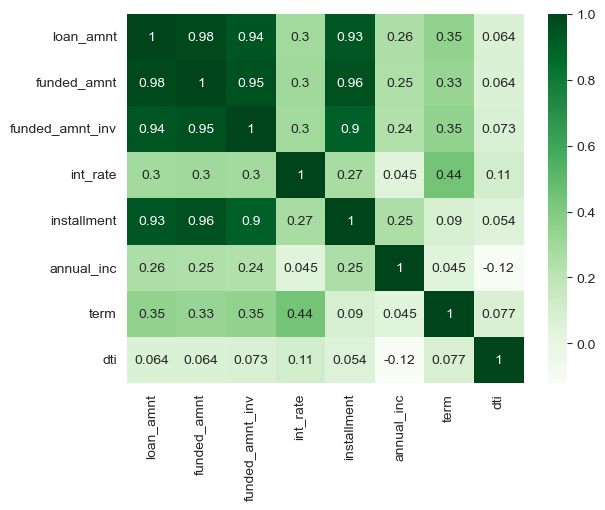

In [412]:
# lets show it in a correlation chart with the key fields as inputs
sns.heatmap(df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'term', 'dti']].corr(), cmap="Greens", annot=True)

###### As seen above, __loan_amnt__, __funded_amnt__, __funded_amnt_inv__, __installment__ are highly correlated.

In [413]:
# Let's look at the interest rate column. Interest rate usually has a lot of impact on repayment capacity of borrowers
df['int_rate'].describe()

count    36136.000000
mean        11.968718
std          3.684652
min          5.420000
25%          9.010000
50%         11.830000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64

In [414]:
#Check the available values and counts for loan_status column
df['loan_status'].value_counts()

Fully Paid     31005
Charged Off     5131
Name: loan_status, dtype: int64

In [415]:
# lets add a derived column from loan_status as loan_status_num
df['loan_status_num'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status_num to integer type
df['loan_status_num'] = df['loan_status_num'].apply(lambda x: pd.to_numeric(x))

# summarising the values and confirm that it indeed matches with the data shown against loan_status column above
df['loan_status_num'].value_counts()

0    31005
1     5131
Name: loan_status_num, dtype: int64

##### Univariate Analysis
###### Using loan_status_num column

In [416]:
# default rate
round(np.mean(df['loan_status_num']), 2)

0.14

###### The overal default rate is ~14%

#### Lets draw some visualisations to better understand the numbers !!

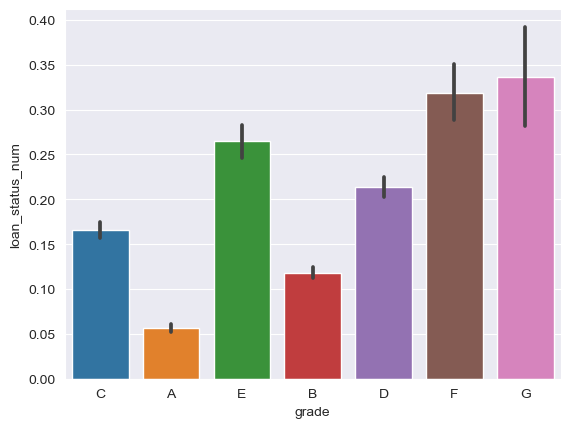

In [417]:
# Visualise the average default rates across categorical variables.
def plot_chart(catVar):
    ax = sns.barplot(x=catVar, y='loan_status_num', data=df)
    plt.show()

# by Grade
plot_chart('grade')

###### From the bar plot above, we see that when grade was A,Charged off loans are lesser. Thus the lending company should consider lending more A grade loans

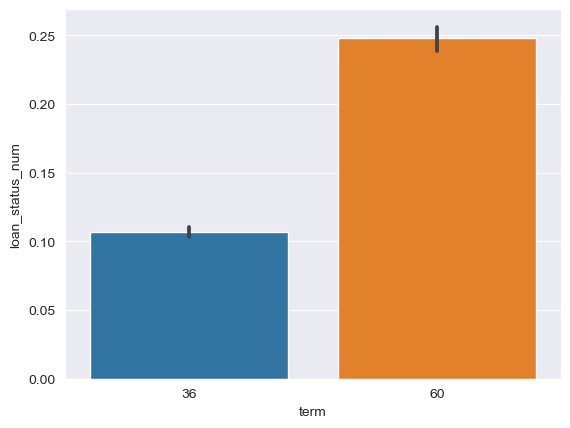

In [418]:
# By loan term
plot_chart('term')

###### As seen above, I have the following observation -
* Loan Status = Charged Off --> if the Loan Tenure is less i.e. 36 months, possibility of defaulting loan is more
* Loan Status = Fully Paid --> Customers are trying to pay the loan ASAP i.e. more customers have closed loan in 36 months compared to 60 months

<Axes: xlabel='loan_status', ylabel='count'>

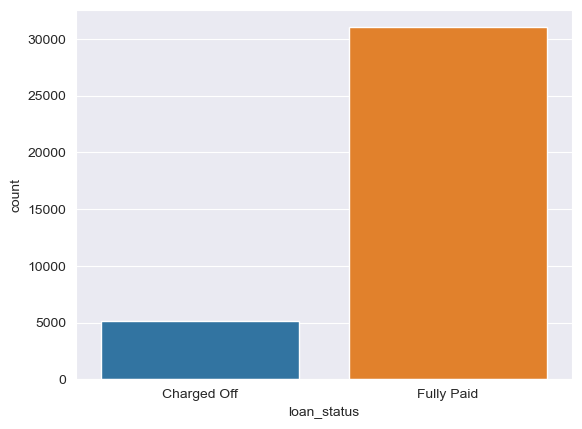

In [419]:
# lets put the above into a count plot
sns.countplot(x='loan_status', data=df)

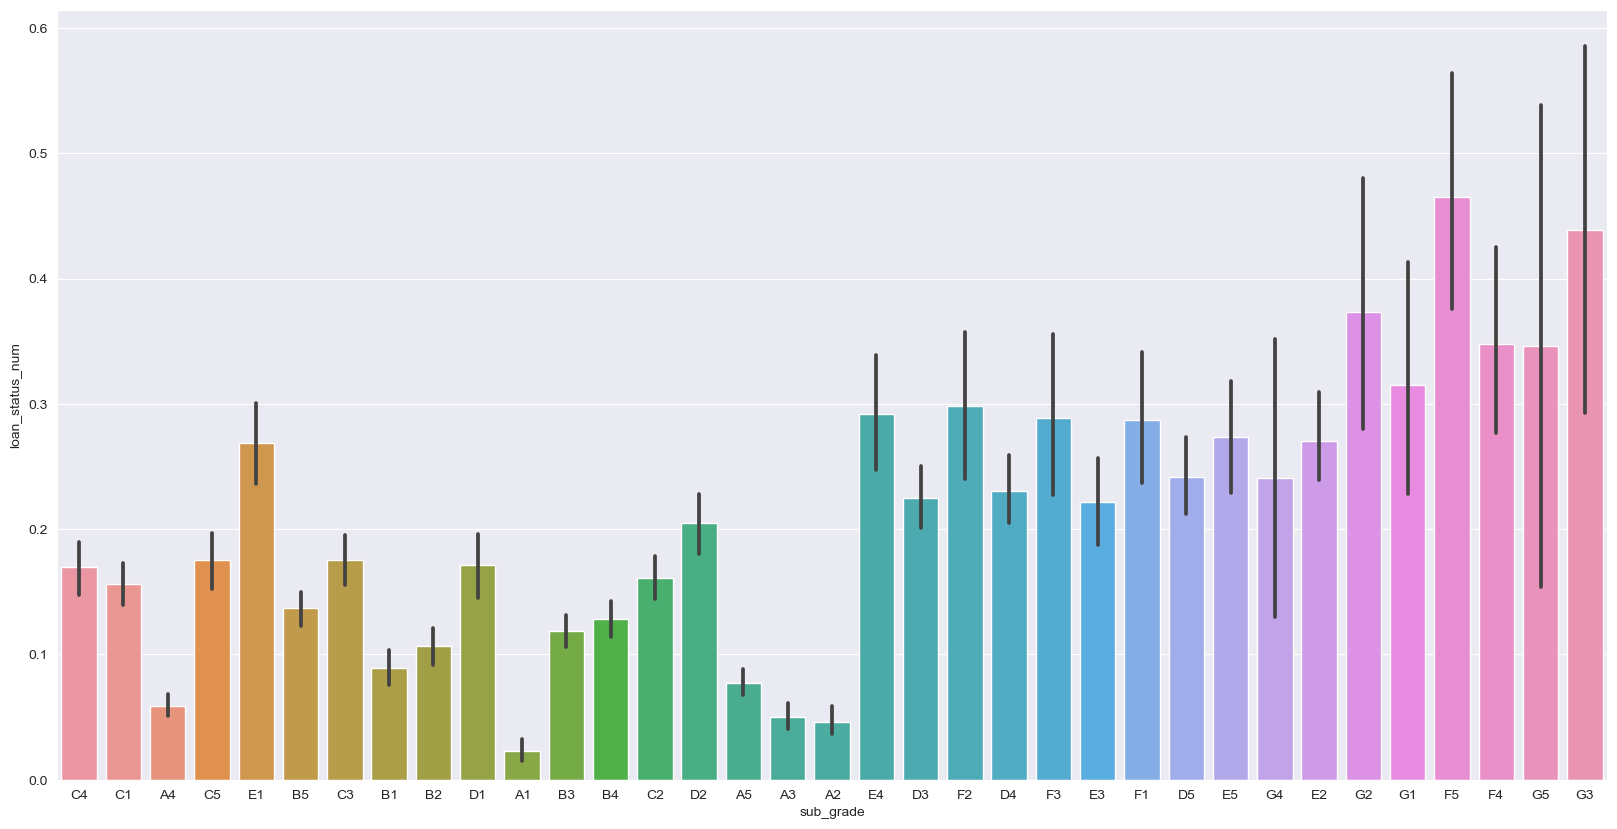

In [420]:
# Loan status by sub-grade
plt.figure(figsize=(20, 10))
plot_chart('sub_grade')

###### As expected - Sub-grade A1 type Loan is better than Sub-grade A2 better than A3 and so on!

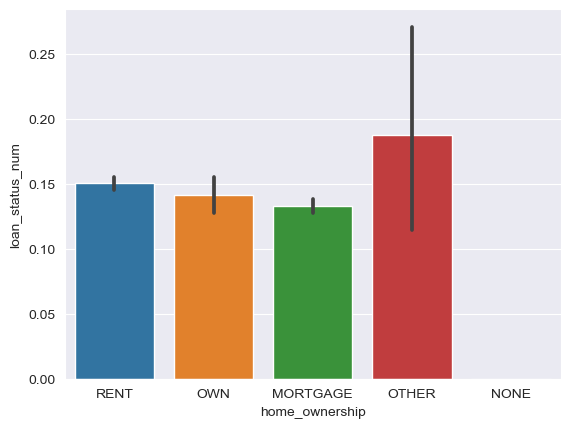

In [421]:
# lets see what type of customers (Depending on their home ownership) apply for loan. Home Loan is not a great discriminator though.
plot_chart('home_ownership')

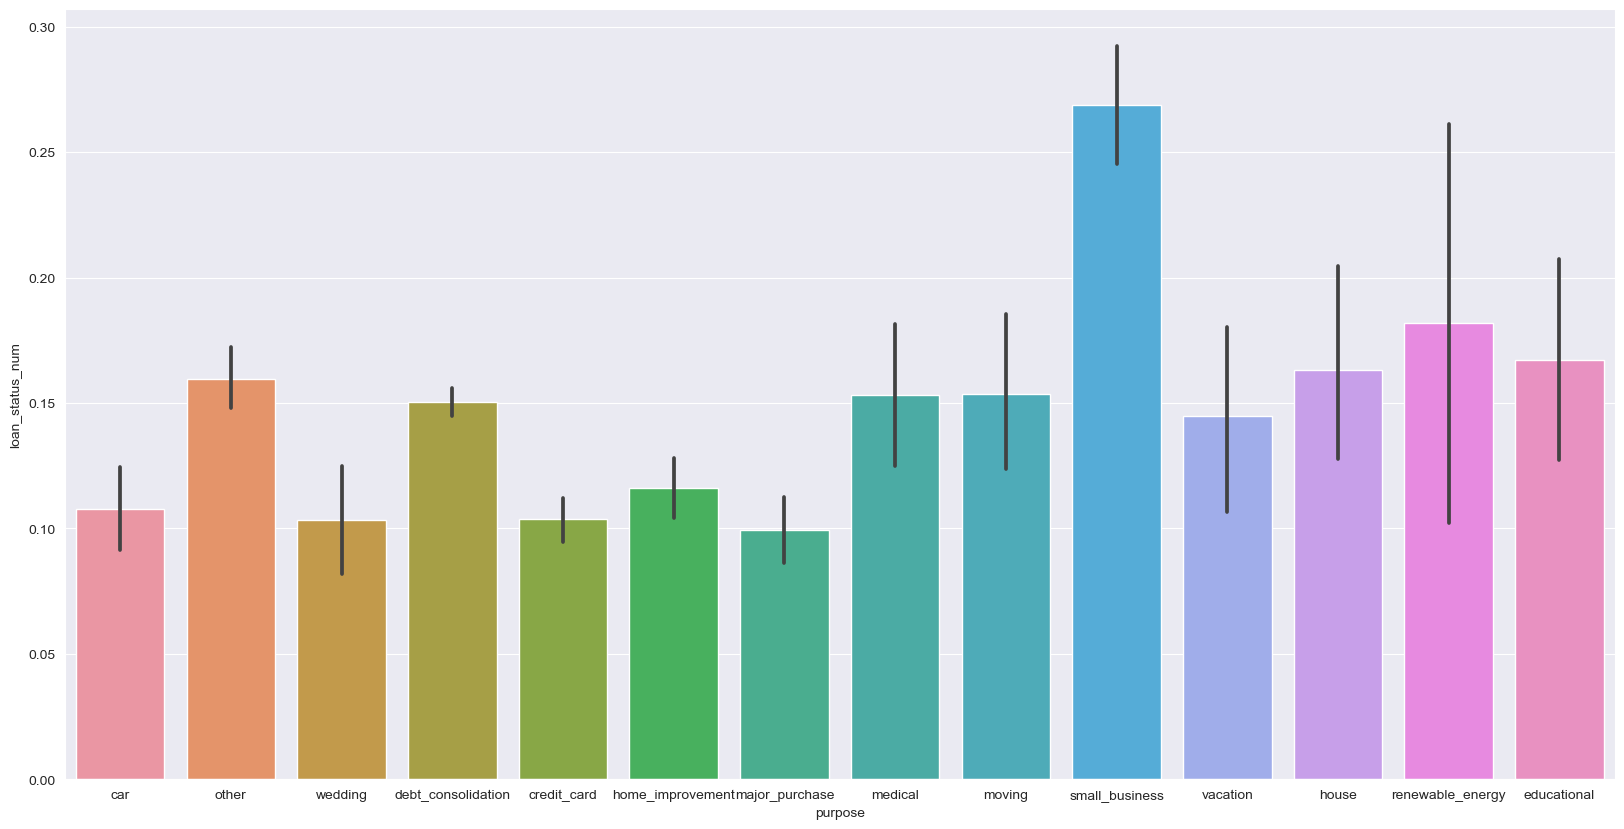

In [422]:
# Loan Status by Purpose
plt.figure(figsize=(20, 10))
plot_chart('purpose')

###### Loans for Small businesses default more than any other purpose.

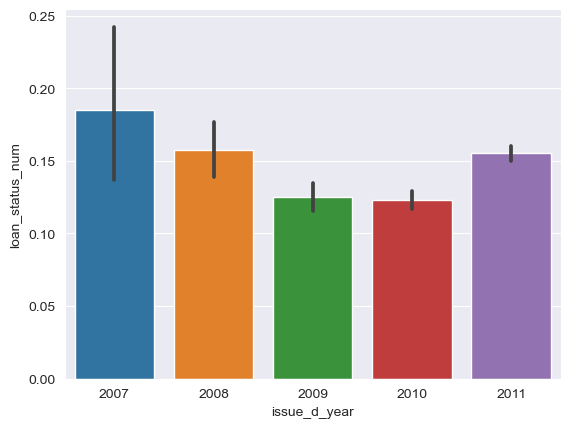

In [423]:
# Loan status by Year i.e. issue_d_year (derived column)
plot_chart('issue_d_year')

###### Default rate suddenly increased in 2011. It was almost the same in 2009 and 2010

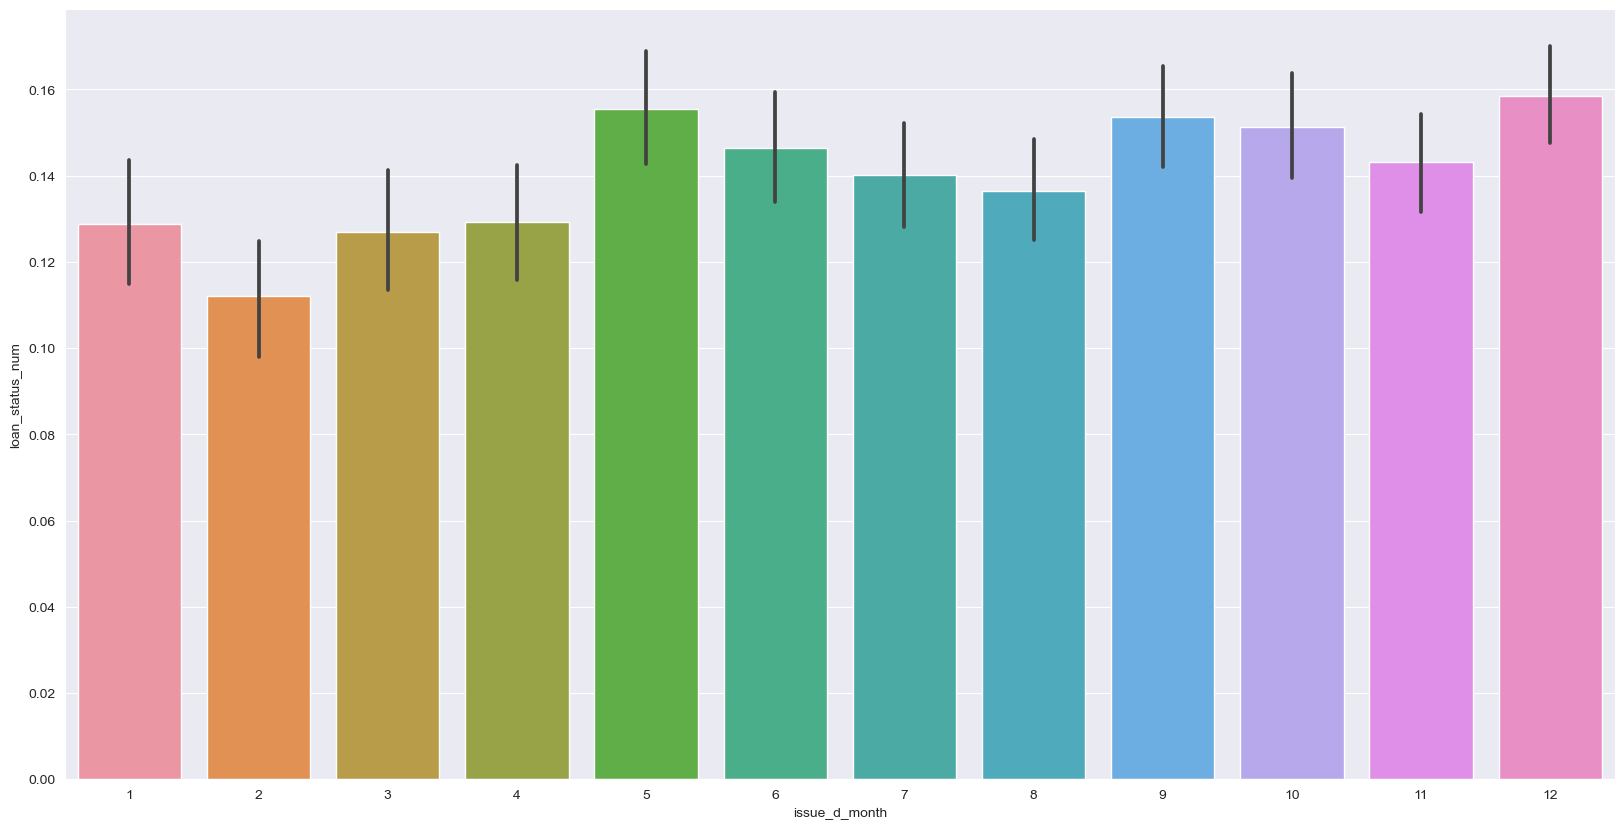

In [424]:
# lets see how it looks if we draw it by month
# comparing default rates across months: not much variation across months
plt.figure(figsize=(20, 10))
plot_chart('issue_d_month')

###### There is not a lot of variation across months

Mean Value of loan amount is -  11102.8


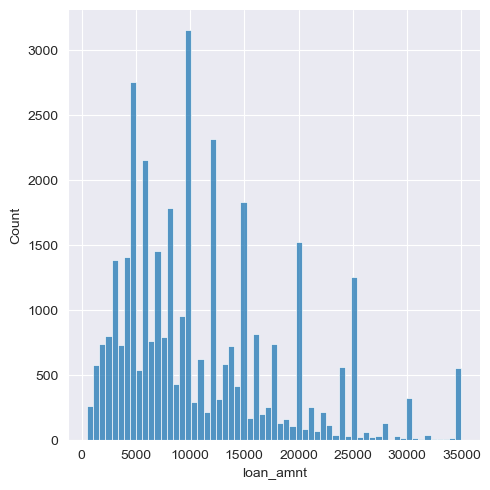

In [425]:
# lets find out if loan amount has any impact of default rate
print('Mean Value of loan amount is - ', round(np.mean(df['loan_amnt']), 2))

# lets plot this -
sns.displot(df['loan_amnt'])
plt.show()

###### This is too much data in a chart to get the exact value/amount and say, this is a risky amount to approve.
###### lets create a ENUM/bin for loan amount and re-plot the above chart

Medium       19466
Low           6803
Very High     5451
High          4416
Name: loan_amnt_category, dtype: int64


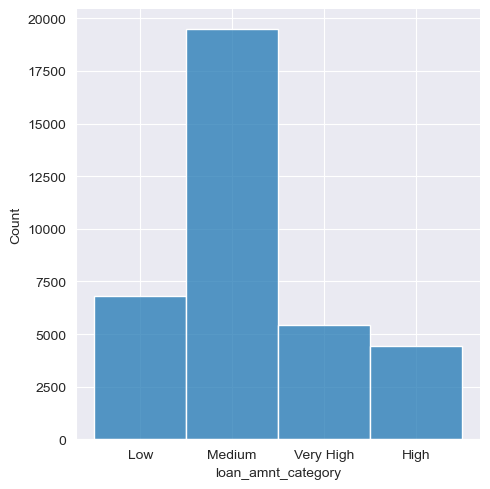

In [426]:
# bucketing/binning loan amount
def bin_amount(n):
    if n < 5000:
        return 'Low'
    elif n >= 5000 and n < 15000:
        return 'Medium'
    elif n >= 15000 and n < 20000:
        return 'High'
    else:
        return 'Very High'

df['loan_amnt_category'] = df['loan_amnt'].apply(lambda x: bin_amount(x))

print(df['loan_amnt_category'].value_counts())

sns.displot(df['loan_amnt_category'])
plt.show()

Medium       19829
Low           8660
High          4077
Very High     3570
Name: funded_amnt_inv_category, dtype: int64


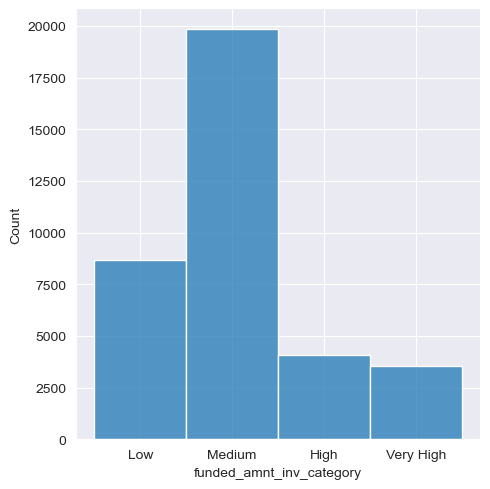

In [427]:
# binning funded_amnt_inv
df['funded_amnt_inv_category'] = df['funded_amnt_inv'].apply(lambda x: bin_amount(x))

print(df['funded_amnt_inv_category'].value_counts())

sns.displot(df['funded_amnt_inv_category'])
plt.show()


Medium       19923
Low           6892
Very High     4861
High          4460
Name: funded_amnt_category, dtype: int64


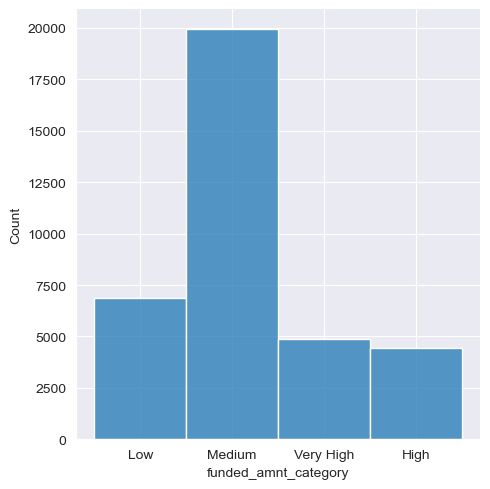

In [428]:
# binning funded_amnt
df['funded_amnt_category'] = df['funded_amnt'].apply(lambda x: bin_amount(x))

print(df['funded_amnt_category'].value_counts())

sns.displot(df['funded_amnt_category'])
plt.show()


Medium       13926
Low          12056
High          6218
Very High     3936
Name: installment_category, dtype: int64


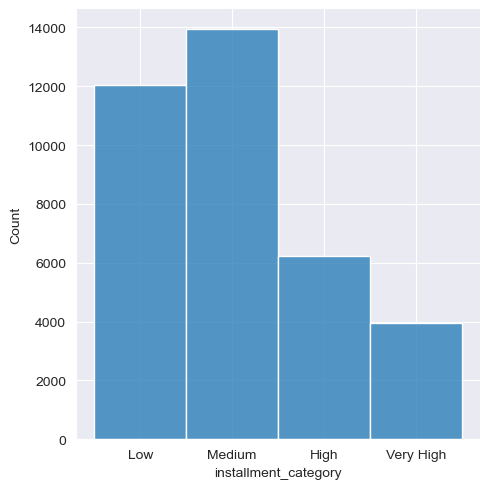

In [429]:
# binning installments
def bin_installment(n):
    if n < 200:
        return 'Low'
    elif n >= 200 and n < 400:
        return 'Medium'
    elif n >= 400 and n < 600:
        return 'High'
    else:
        return 'Very High'

df['installment_category'] = df['installment'].apply(lambda x: bin_installment(x))

print(df['installment_category'].value_counts())

sns.displot(df['installment_category'])
plt.show()

Medium       17419
Low          13151
High          4025
Very High     1541
Name: annual_inc_category, dtype: int64


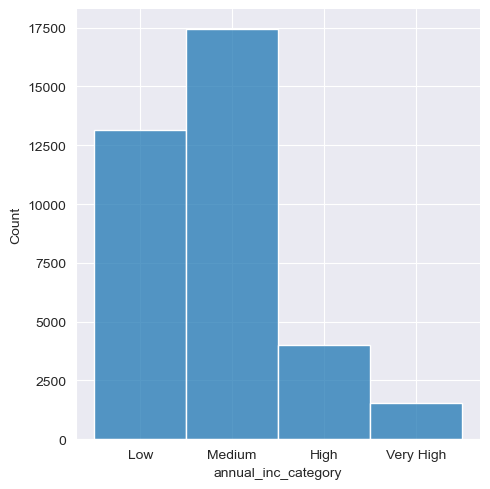

In [430]:
# Repeat same for annual_inc
def bin_annual_inc(n):
    if n < 50000:
        return 'Low'
    elif n >= 50000 and n < 100000:
        return 'Medium'
    elif n >= 100000 and n < 150000:
        return 'High'
    else:
        return 'Very High'

df['annual_inc_category'] = df['annual_inc'].apply(lambda x: bin_annual_inc(x))

print(df['annual_inc_category'].value_counts())

sns.displot(df['annual_inc_category'])
plt.show()


In [431]:
###### As seen above, Lower the annual income, Higher the default rate

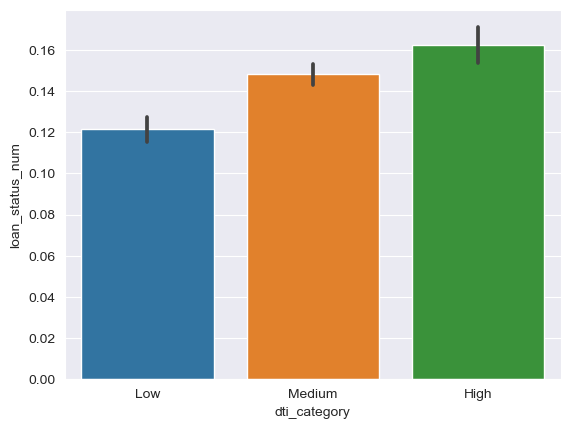

In [432]:
# debt to income ratio
def dti_binning(n):
    if n <= 10:
        return 'Low'
    elif n > 10 and n <=20:
        return 'Medium'
    else:
        return 'High'


df['dti_category'] = df['dti'].apply(lambda x: dti_binning(x))

plot_chart('dti_category')

###### As visible, high dti translates into higher default rates

######  Segmented Univariate Analysis
###### Using loan_status_num column

In [433]:
# Looking at "Loan Status by Purpose" above, lets look at the top 5 entries
# filtering the df for the 4 types of loans mentioned above
shortlisted = ["credit_card", "debt_consolidation", "home_improvement", "major_purchase"]
df = df[df['purpose'].isin(shortlisted)]
print(df['purpose'].value_counts())

debt_consolidation    17231
credit_card            4721
home_improvement       2666
major_purchase         2002
Name: purpose, dtype: int64


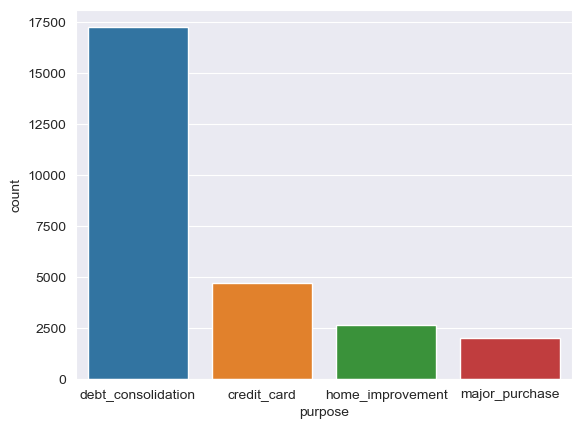

In [434]:
# plotting number of loans by purpose
sns.countplot(x=df['purpose'])
plt.show()

###### Plot chart with purpose of loan and another categorical variable (which keeps changes)

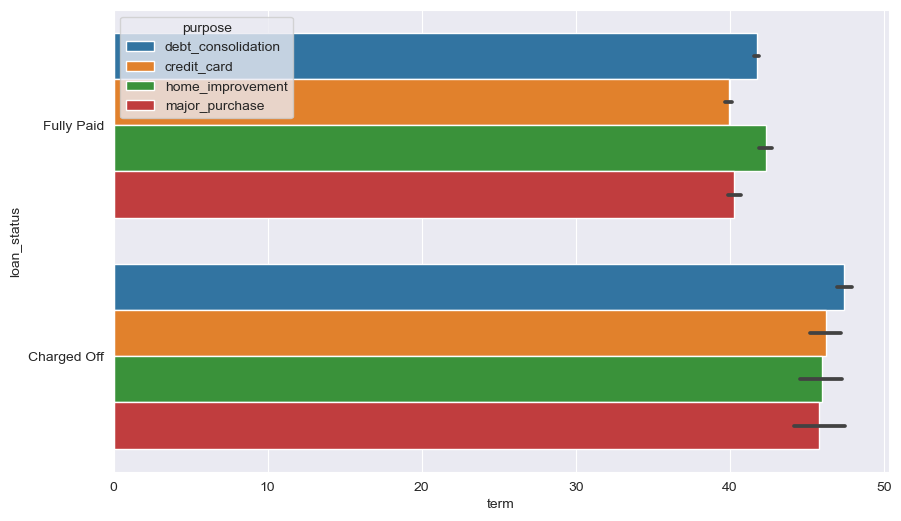

In [435]:
plt.figure(figsize=[10, 6])
sns.barplot(x='term', y="loan_status", hue='purpose', data=df)
plt.show()

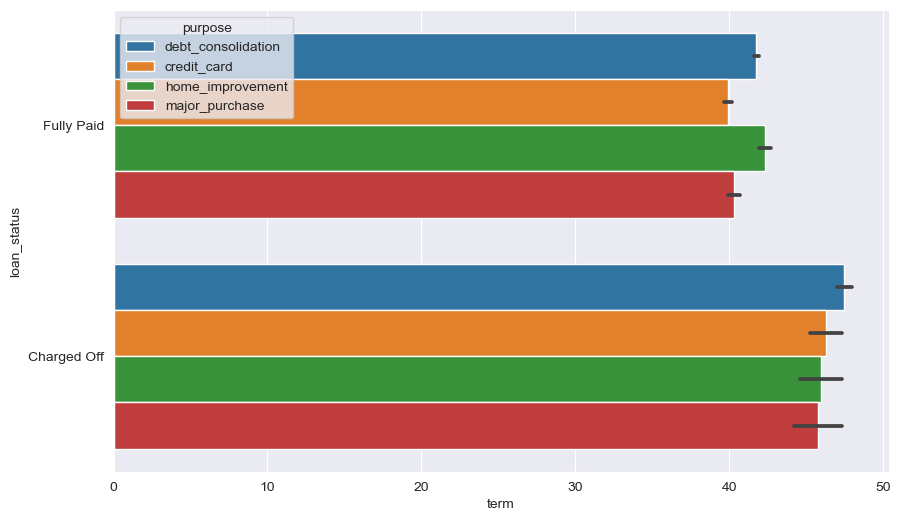

In [436]:
# Takes a categorical variable and plots the Loan Staus Rate by input provided..
# segmented by purpose

def plot_segmented(variable):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=variable, y='loan_status', hue='purpose', data=df)
    plt.show()


plot_segmented('term')

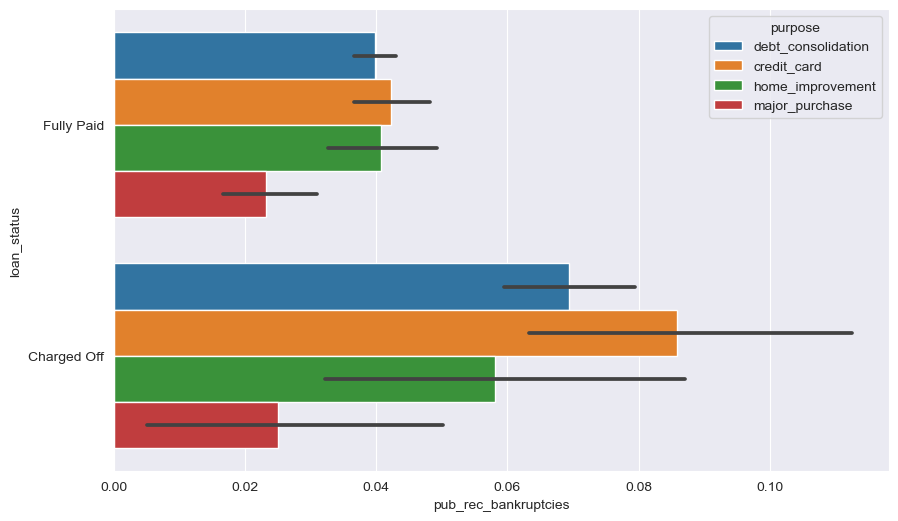

In [437]:
# data based on interest rates
plot_segmented('pub_rec_bankruptcies')

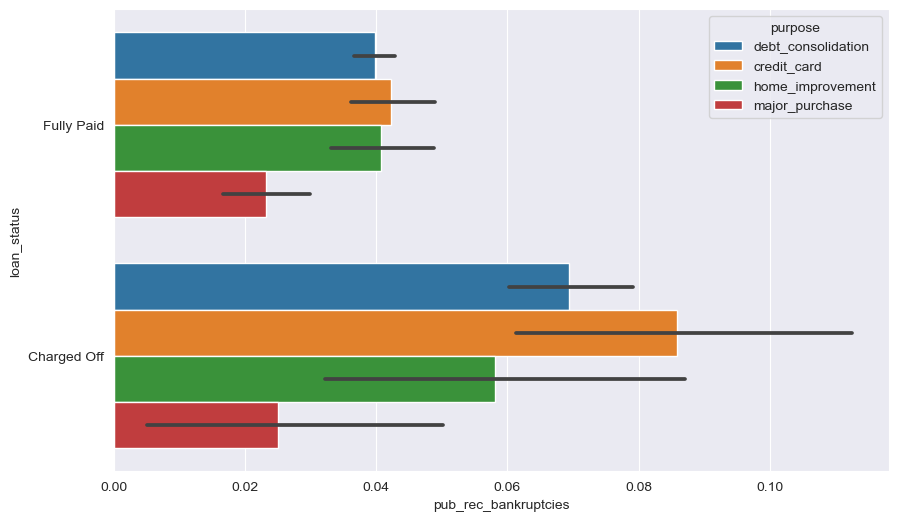

In [438]:
plot_segmented('pub_rec_bankruptcies')

### Conclusion
#### Final list of driver variables which should be used as strong indicators for predicting loans default -
* Term --> Longer loan tenures are at a higher risk of defaulting
* Grade --> Lending Club should provide more Grade A loans. G Grade loans are at a much higher risk.
* Purpose --> Loans for Small businesses default more than any other purpose
* Annual Income Classification --> Explains which income group consumer can have more loan default
* Loan Amount --> Explains that medium loan amount usually has a higher loan default rate.